<a href="https://colab.research.google.com/github/koud-dany/Credit-card-fraud-detection/blob/main/detectionfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
path='/content/gdrive/MyDrive/creditcard.csv'
# path= 'resources/creditcard.csv'
data= pd.read_csv(path)

data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.isna().sum().sum()

0

In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe().T.iloc[20:30]

,count,mean,std,min,25%,50%,75%,max
V20,284807.0,6.406204e-16,0.770925,-54.497720,-0.211721,-0.062481,0.133041,39.420904
V21,284807.0,1.654067e-16,0.734524,-34.830382,-0.228395,-0.029450,0.186377,27.202839
V22,284807.0,-3.568593e-16,0.725702,-10.933144,-0.542350,0.006782,0.528554,10.503090
V23,284807.0,2.578648e-16,0.624460,-44.807735,-0.161846,-0.011193,0.147642,22.528412
V24,284807.0,4.473266e-15,0.605647,-2.836627,-0.354586,0.040976,0.439527,4.584549
V25,284807.0,5.340915e-16,0.521278,-10.295397,-0.317145,0.016594,0.350716,7.519589
V26,284807.0,1.683437e-15,0.482227,-2.604551,-0.326984,-0.052139,0.240952,3.517346
V27,284807.0,-3.660091e-16,0.403632,-22.565679,-0.070840,0.001342,0.091045,31.612198
V28,284807.0,-1.227390e-16,0.330083,-15.430084,-0.052960,0.011244,0.078280,33.847808
Amount,284807.0,8.834962e+01,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000


In [8]:
columns= [column for column in data.columns]

In [9]:
fraudulent= data[data['Class']== 1]
not_fraudulent= data[data['Class']== 0]

In [10]:
fraudcount= fraudulent['Class'].count()
notfraudcount= not_fraudulent['Class'].count()

In [11]:
fraudcount

492

In [12]:
notfraudcount

284315

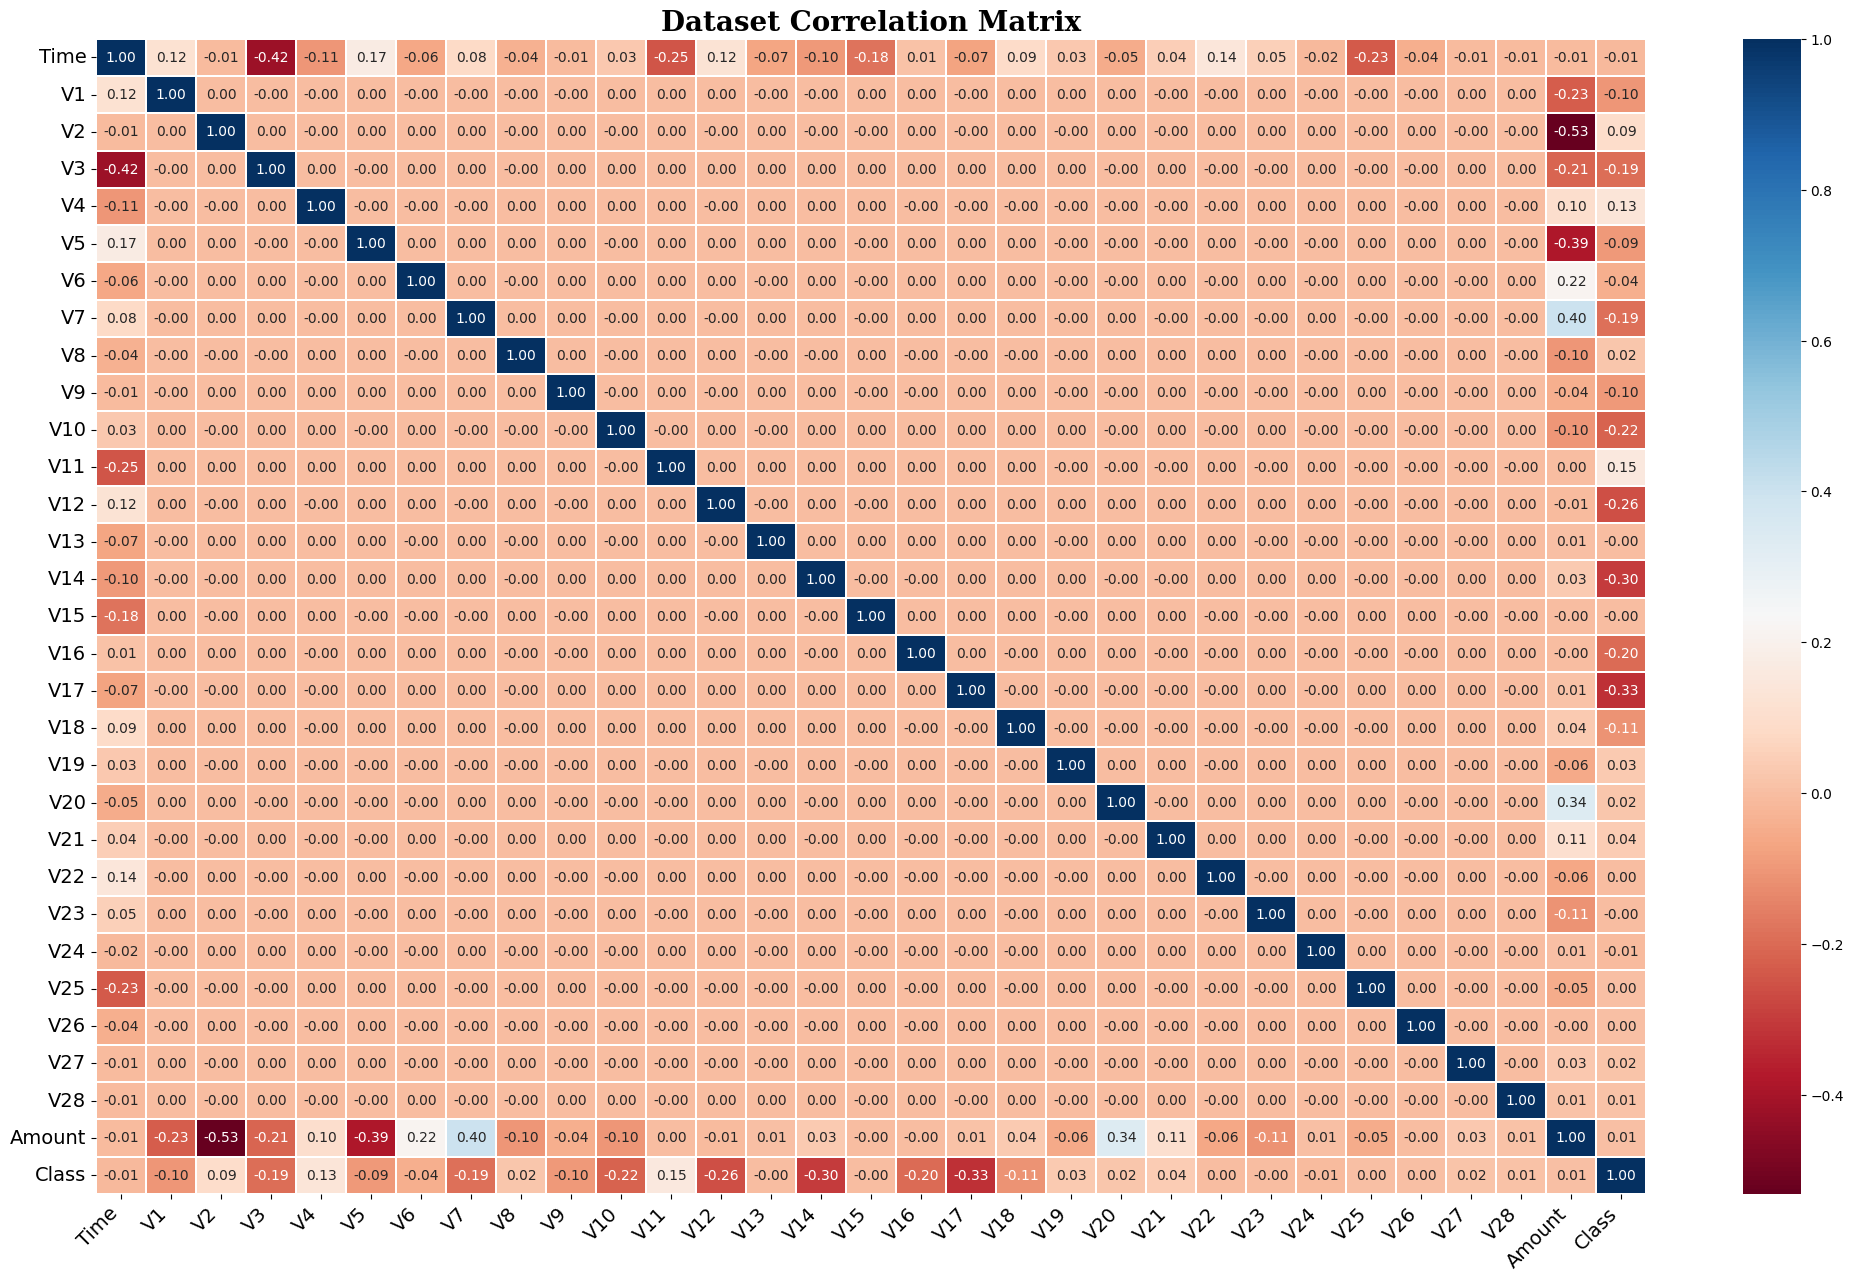

In [13]:
#plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[25,15])
sns.heatmap(data.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap="RdBu")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict={'family': 'serif', 'color': 'black', 'size': 20, 'weight': 'bold'})
plt.xticks(rotation=45, ha='right')
fig.show()

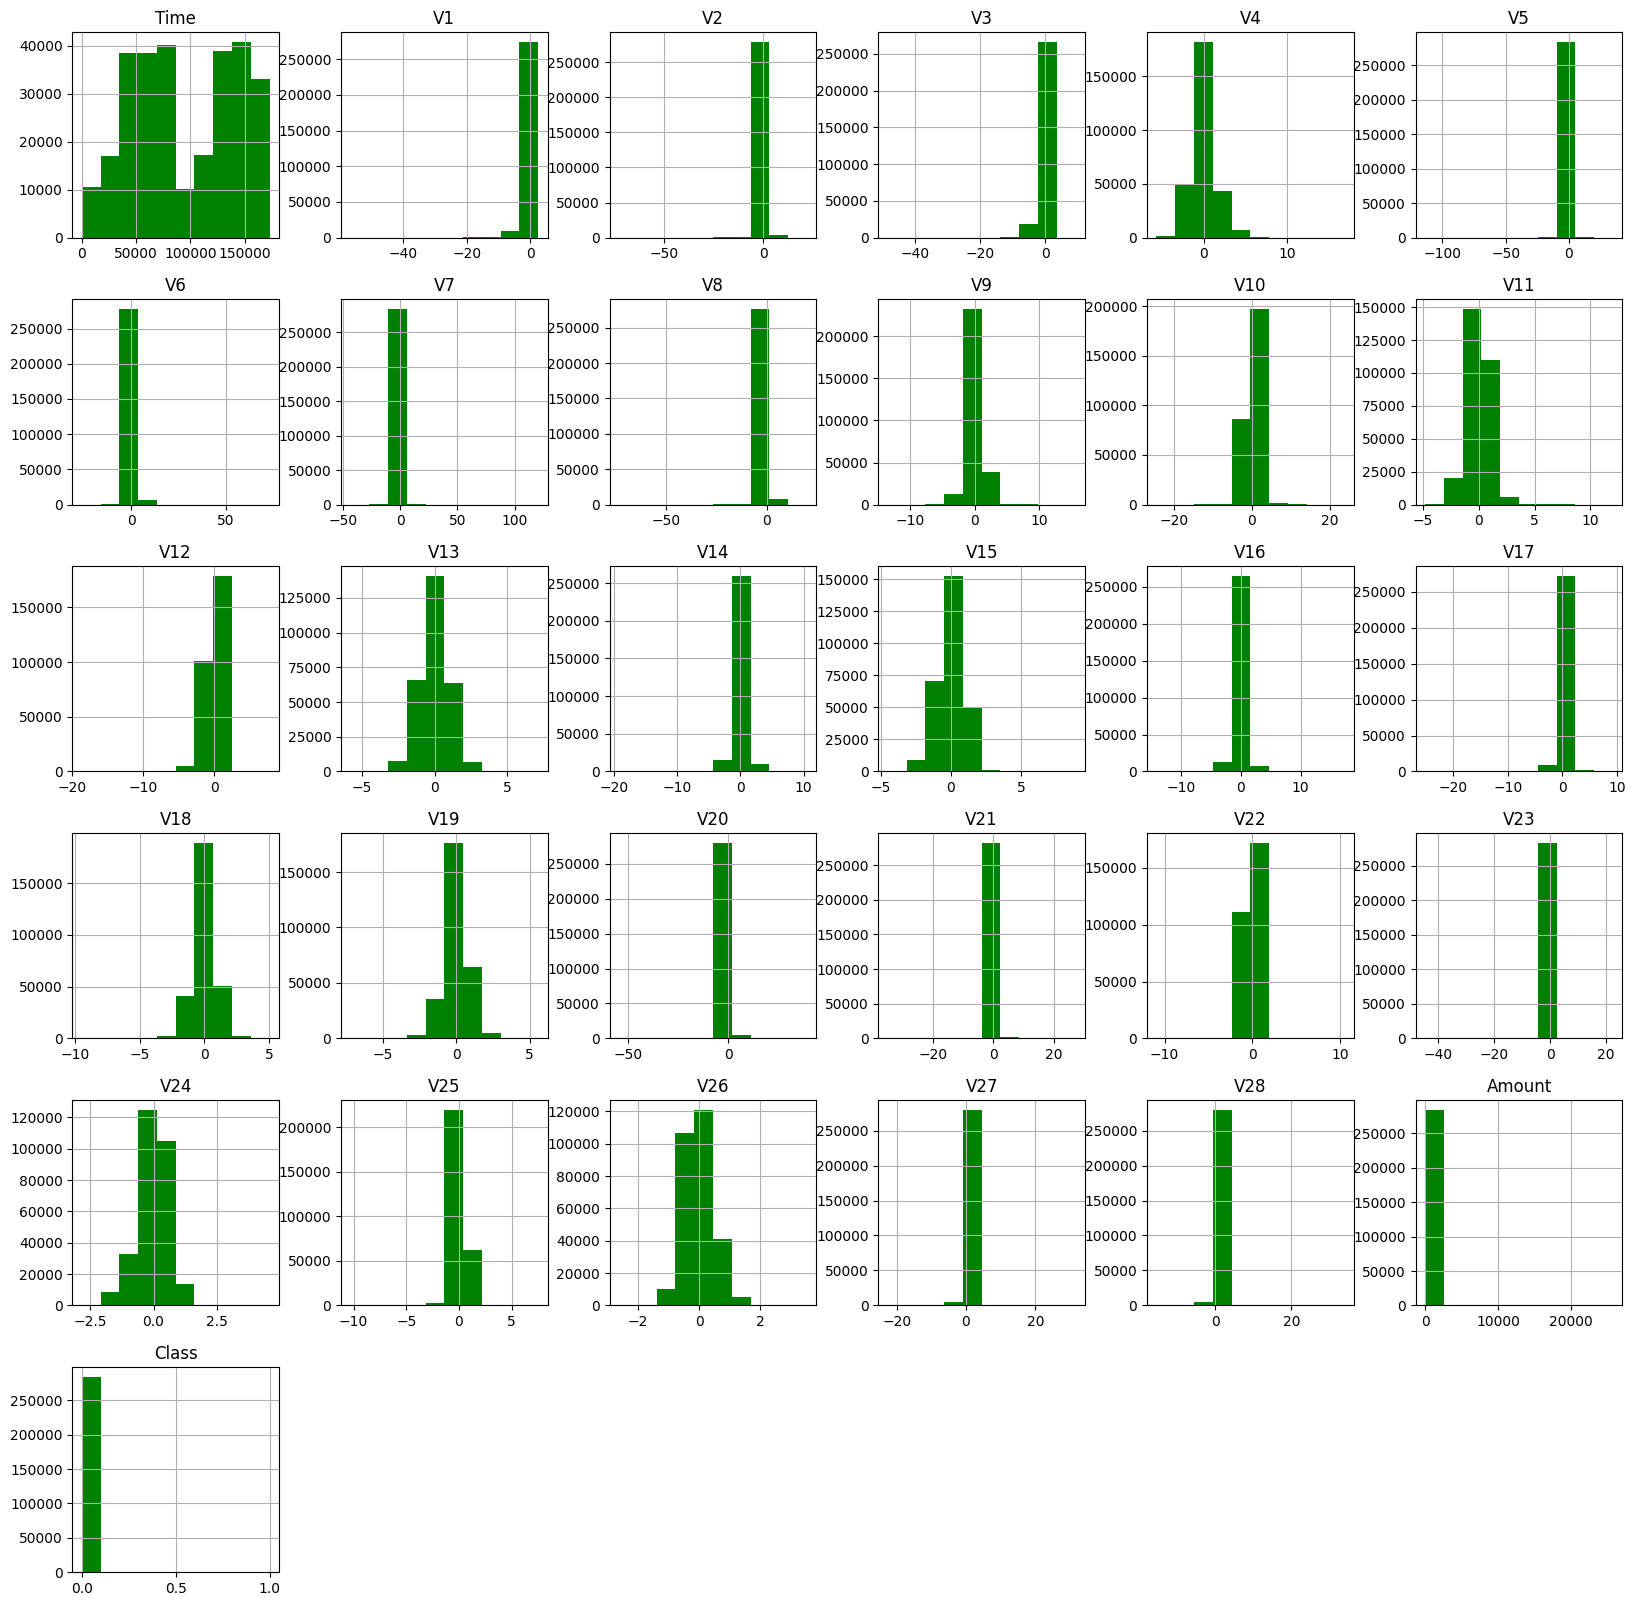

In [14]:
data.hist(figsize=(20,20),color='green')
plt.show()

<ipython-input-15-b455ef40349c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[10,5])


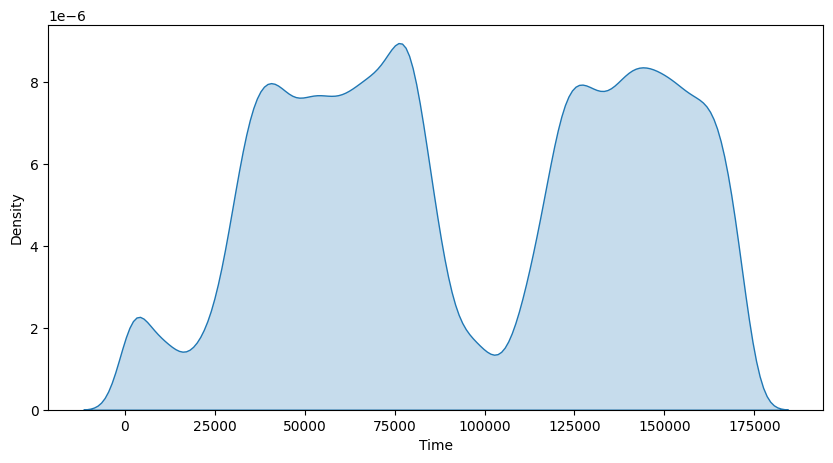

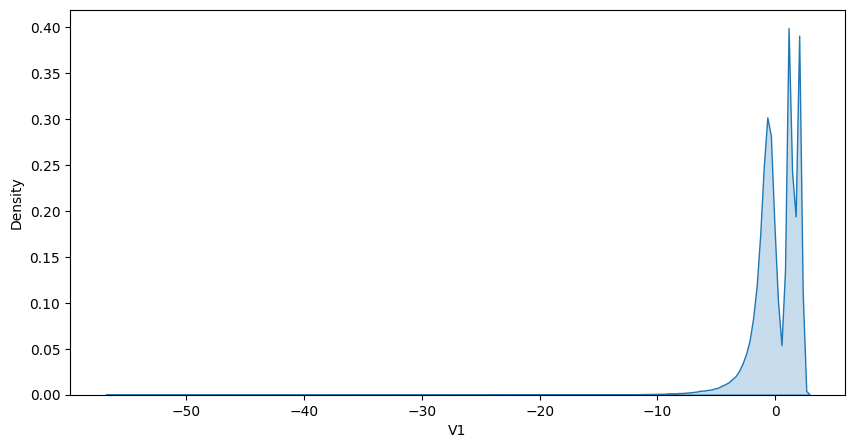

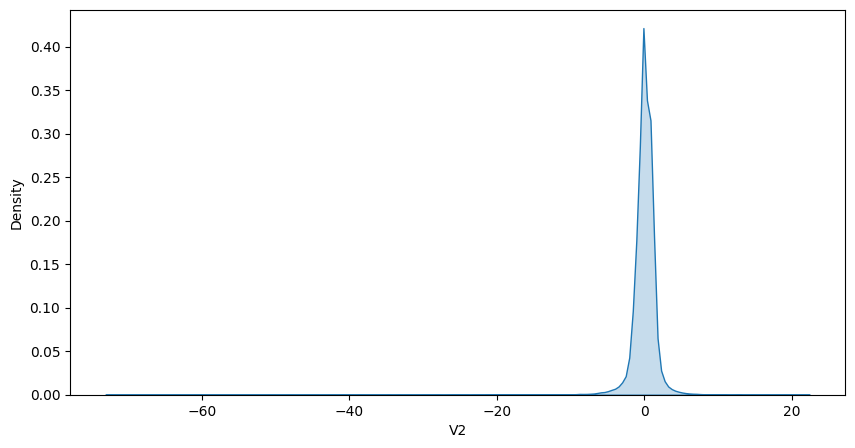

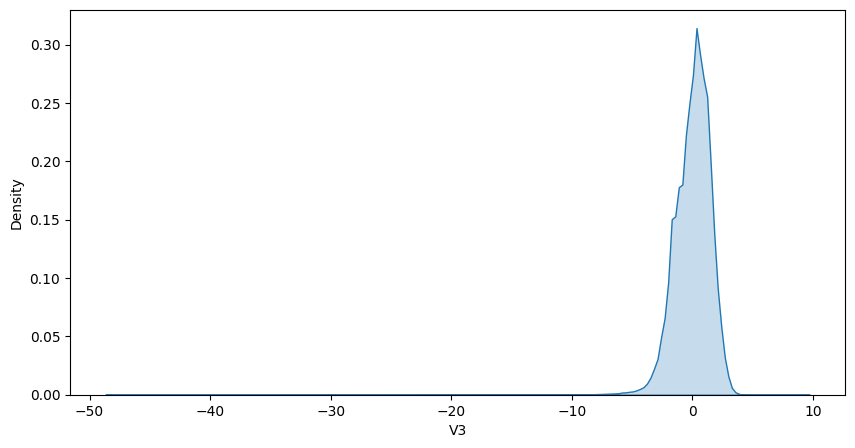

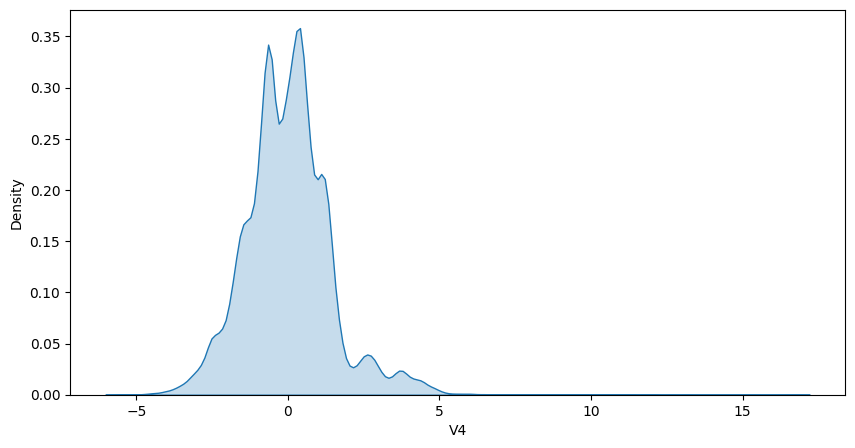

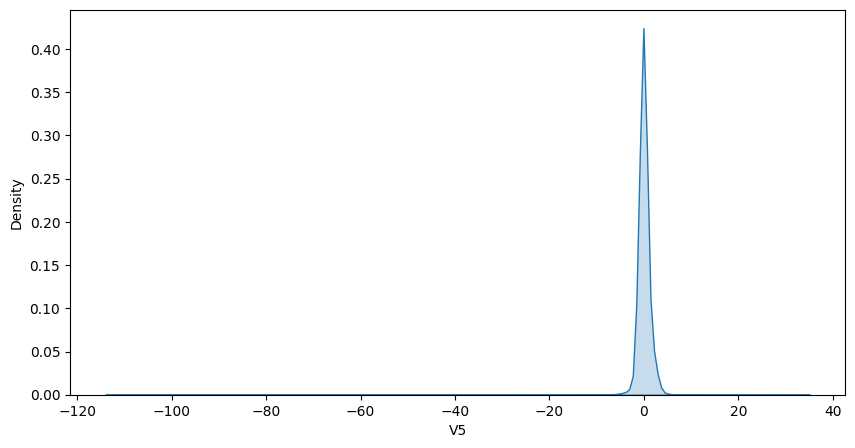

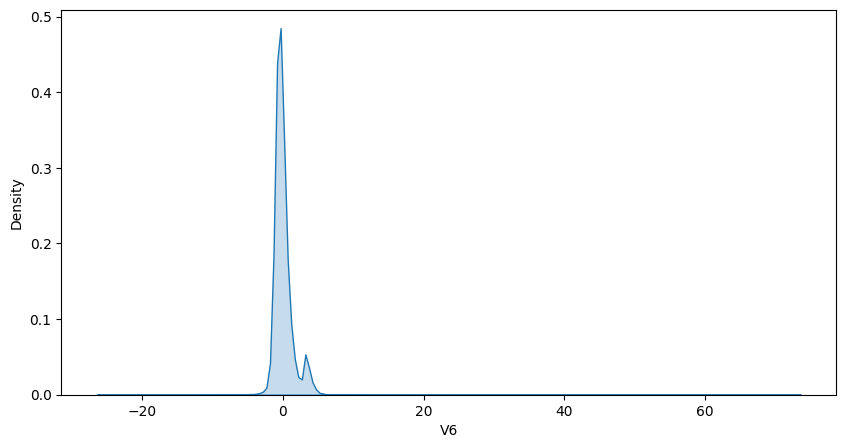

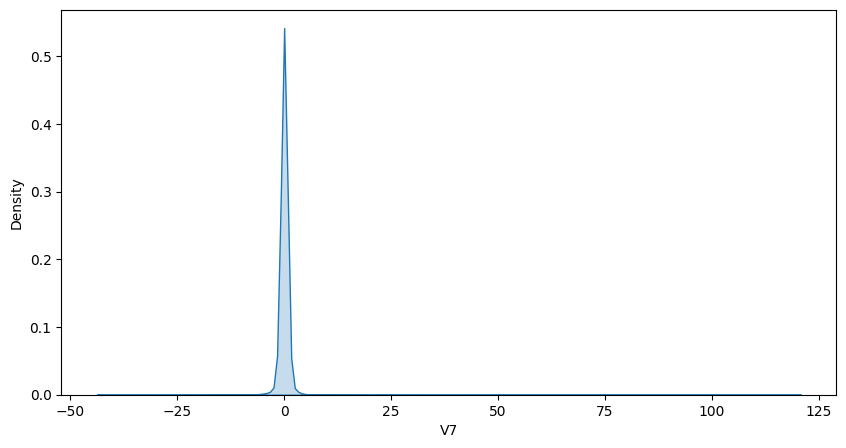

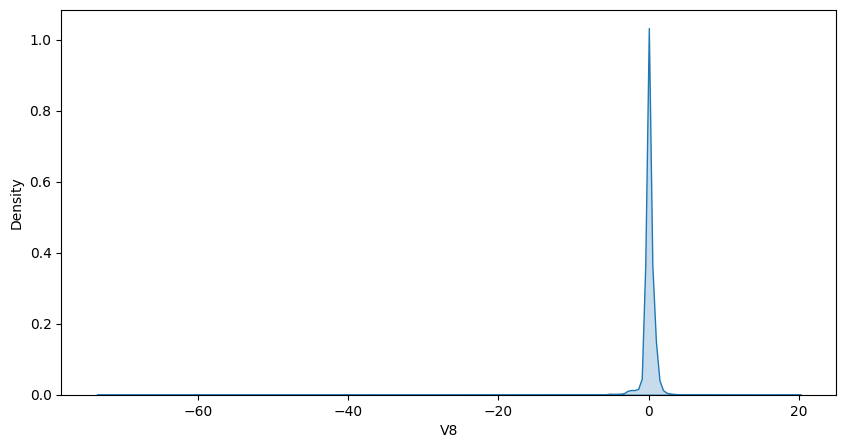

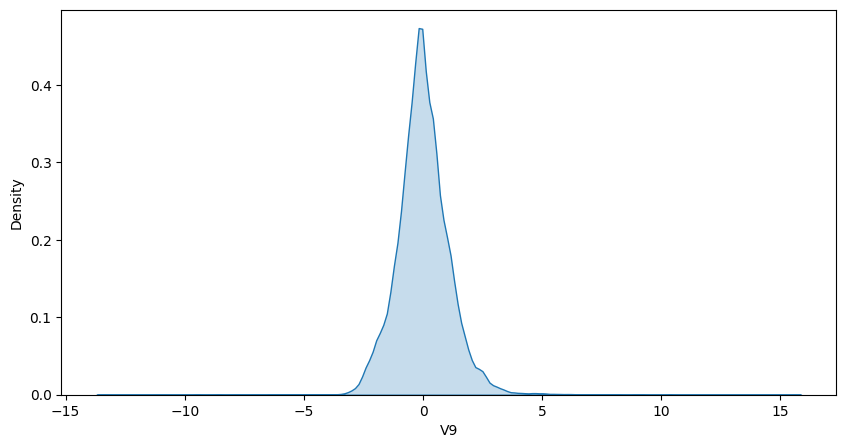

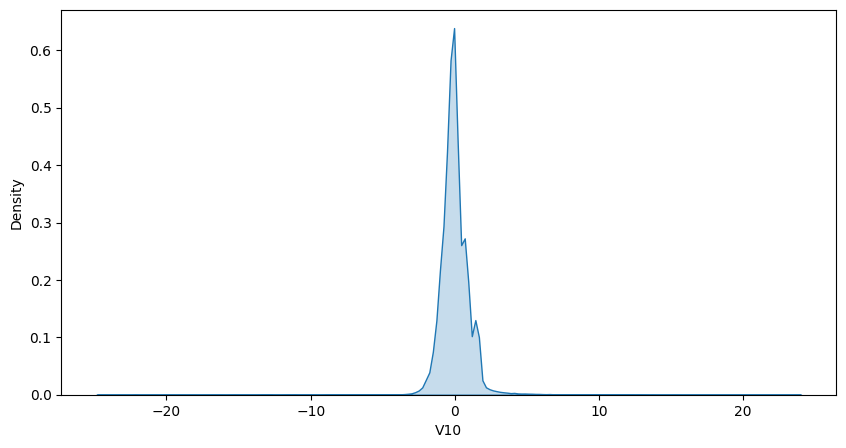

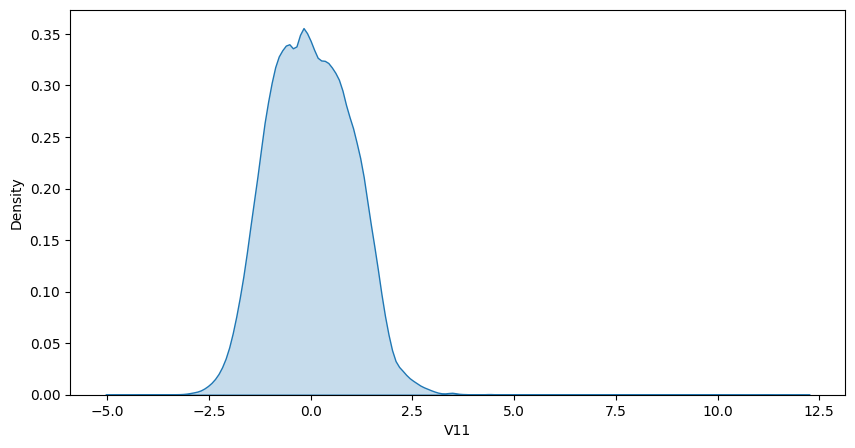

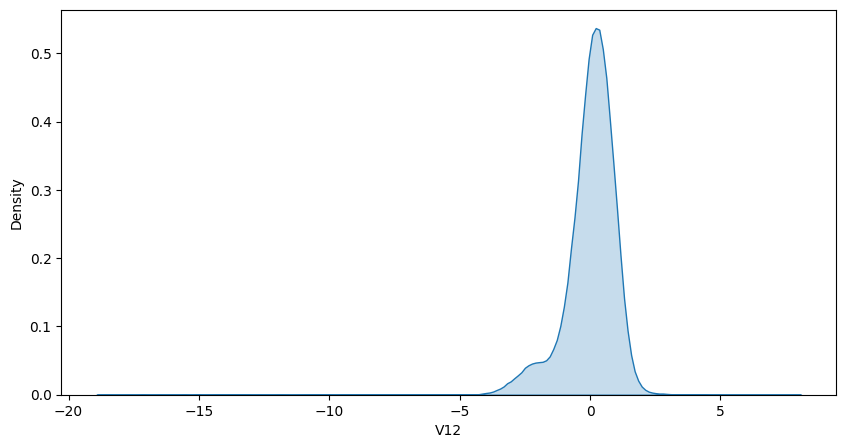

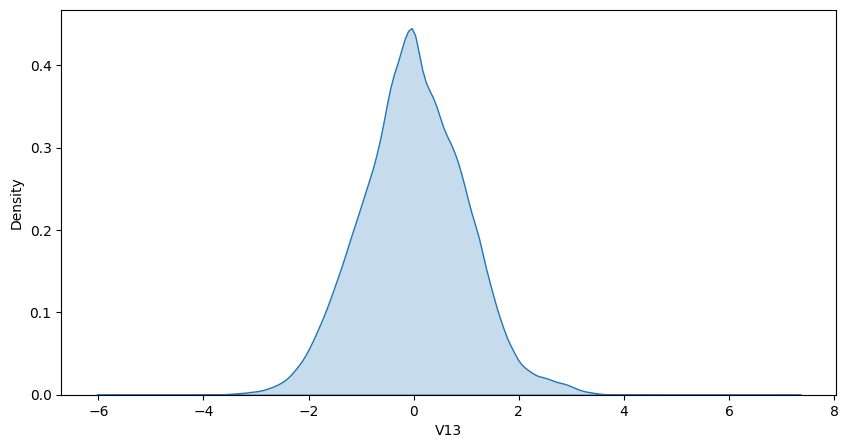

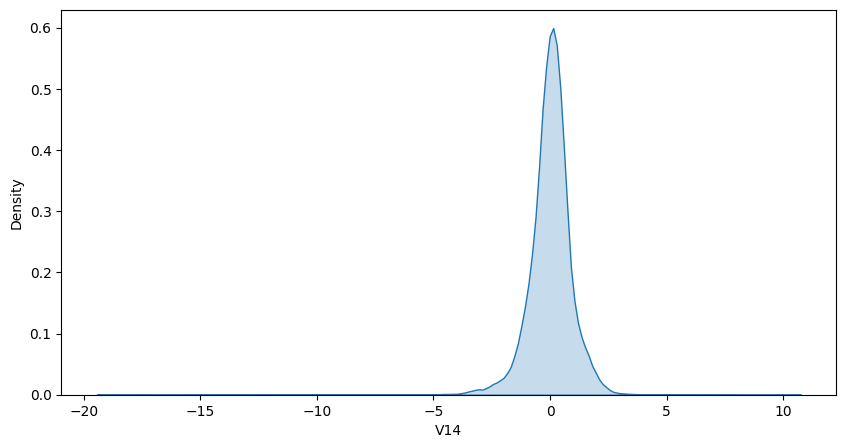

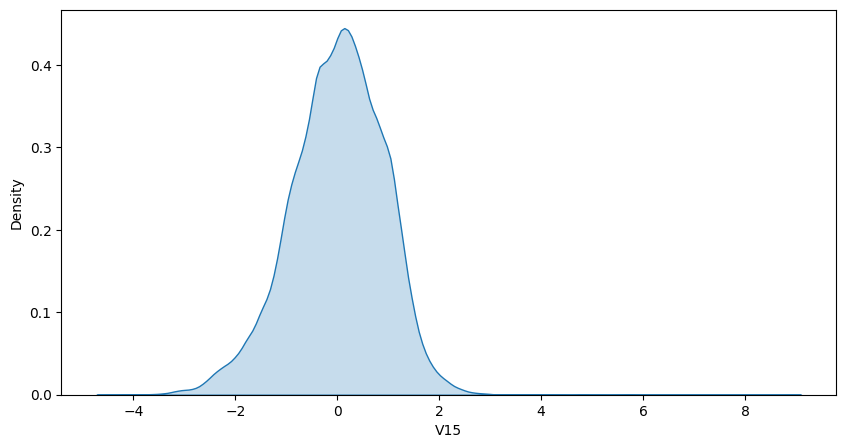

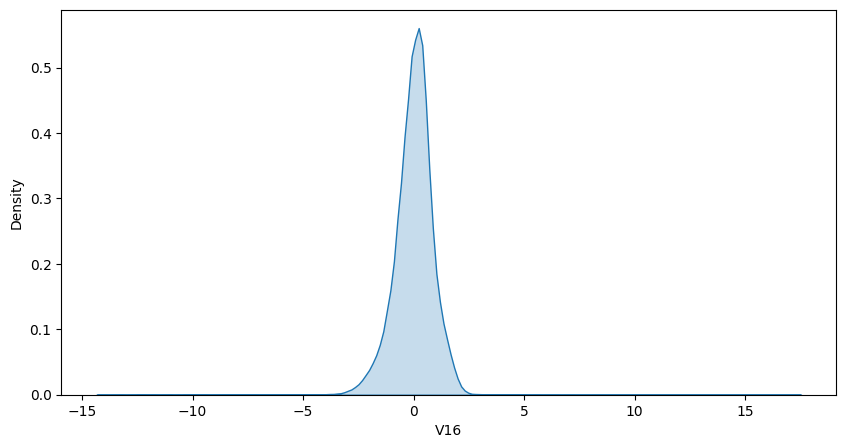

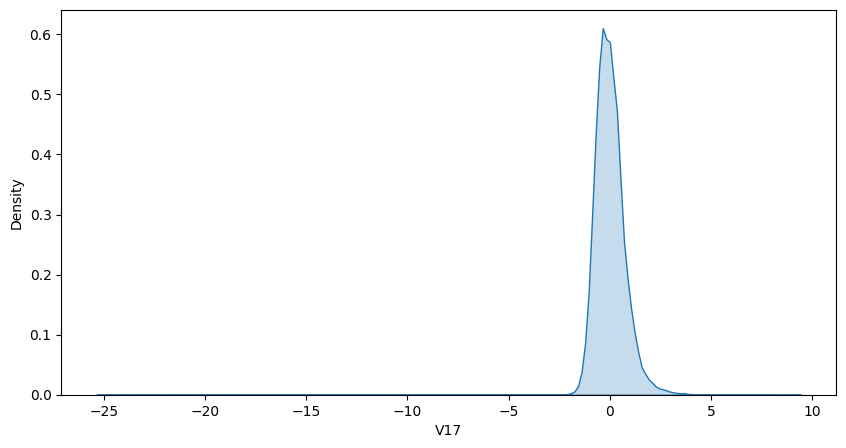

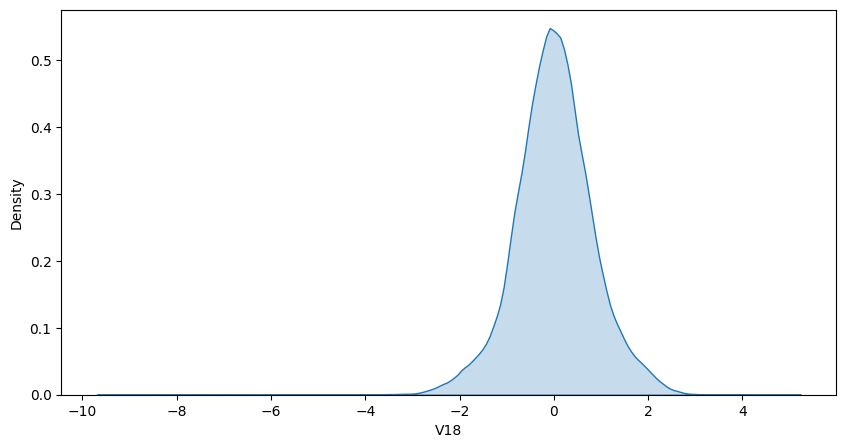

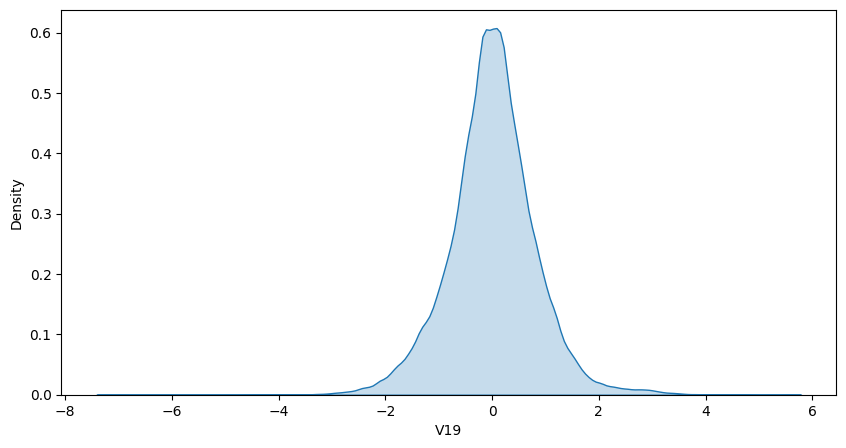

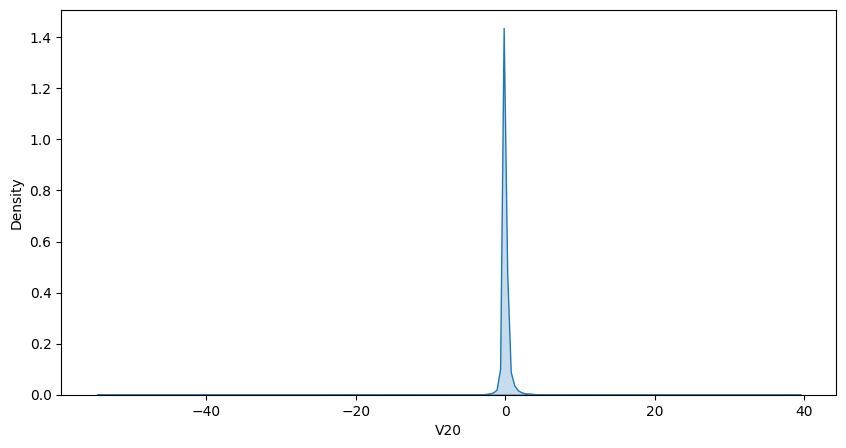

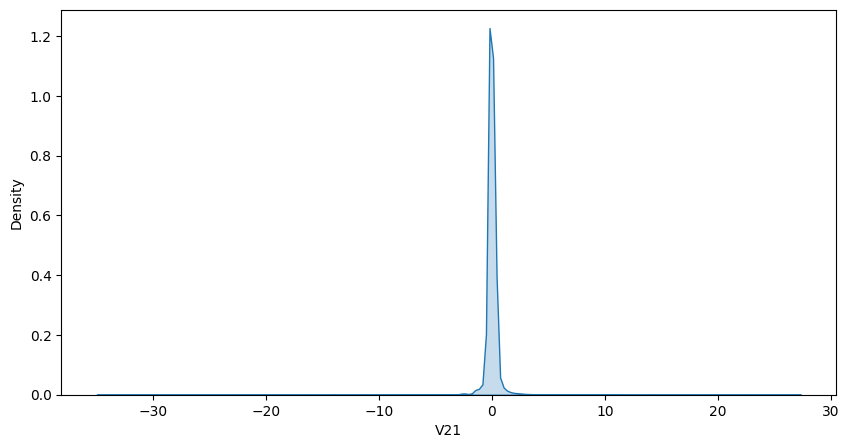

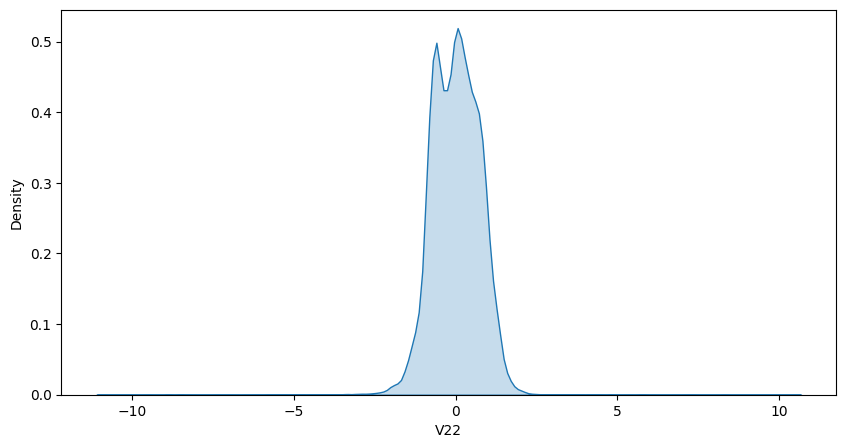

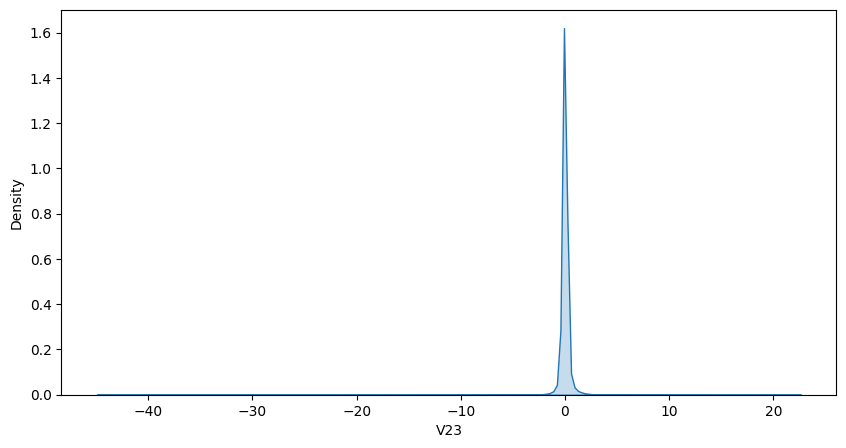

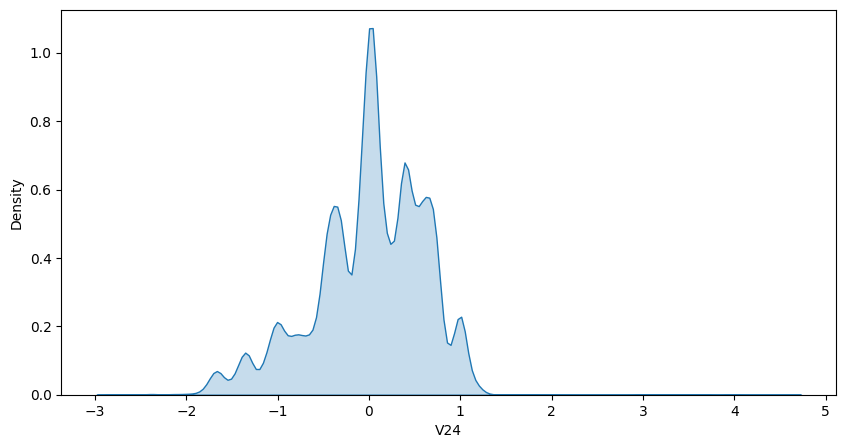

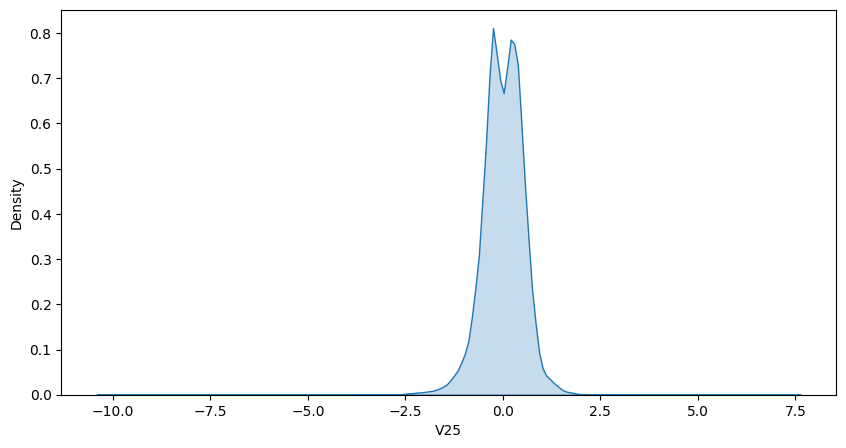

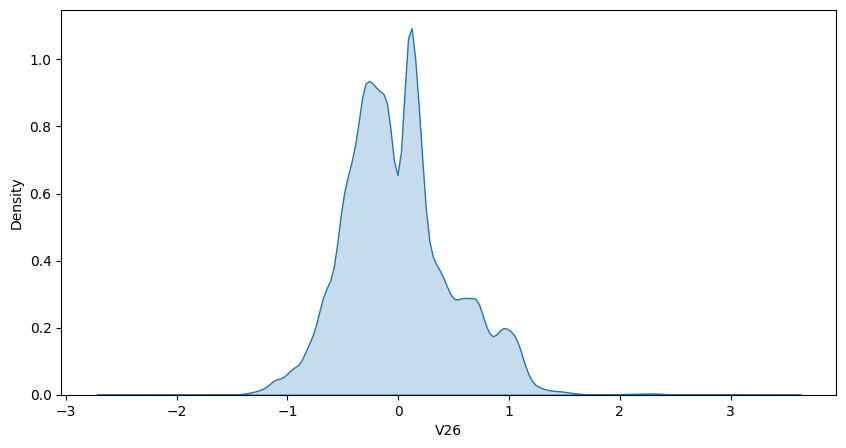

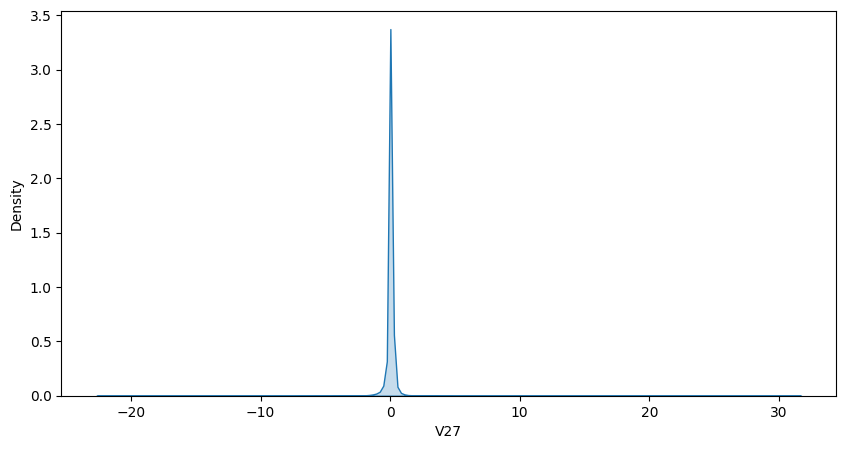

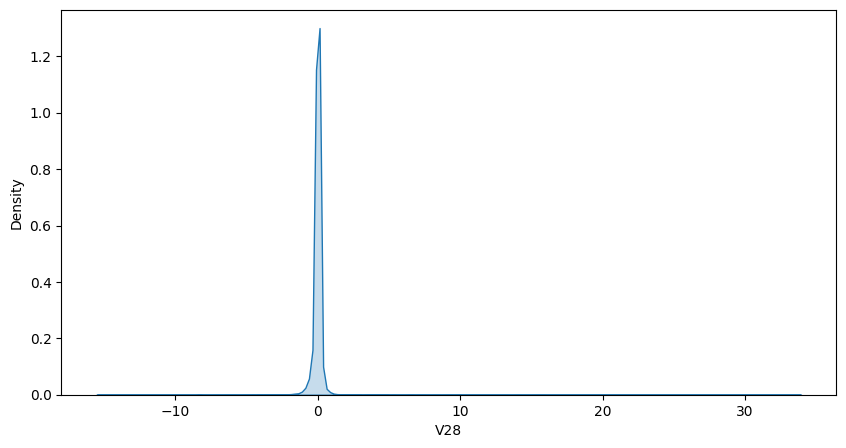

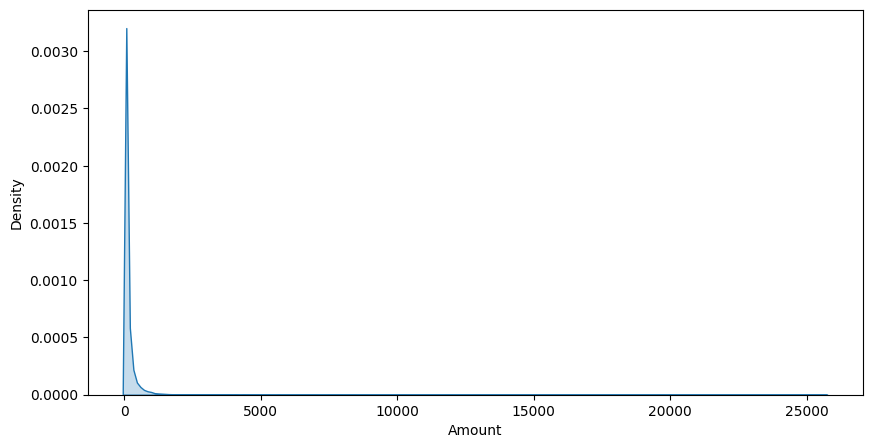

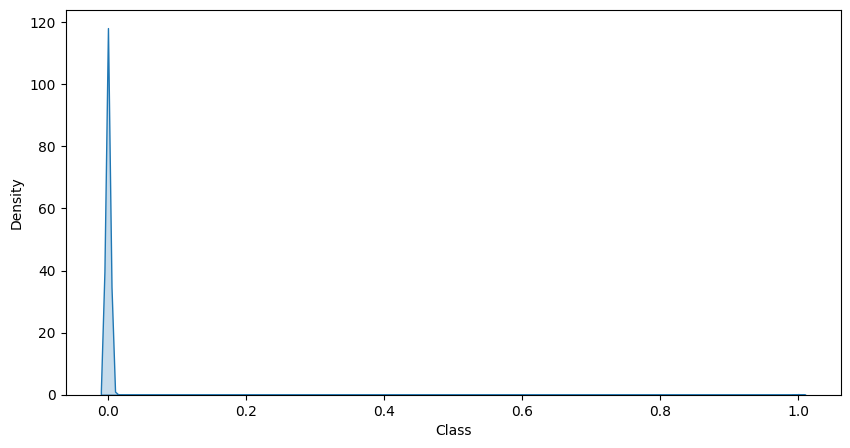

In [15]:
for col in columns:
    plt.figure(figsize=[10,5])
    sns.kdeplot(data[col],fill=True)

It doesn't seem necessary to apply a transformation on the distributions

* ## **MODEL 1**
# LOGISTIC REGRESSION 
let predict fraud transactions from the given data set.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [17]:
X= data.iloc[:,:30]
y= data["Class"]

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

print(f"Testing Data Score: {pipe.score(X_train, y_train)}")
print(f"Testing Data Score: {pipe.score(X_test, y_test)}")

Testing Data Score: 1.0
Testing Data Score: 1.0


In [83]:
# Translate the binary result into text
def result(pred, test):
    alert1=[]
    alert2= []
    for rst in pred:
        if rst == 0 :
            alert1.append('not fraudulent')
        else :
            alert1.append('fraudulent')
    for rst in test:
        if rst == 0 :
            alert2.append('not fraudulent')
        else :
            alert2.append('fraudulent')
    return pd.DataFrame({"Prediction": pred, "Actual": test, 'predicted result':alert1,'Actual result':alert2}).reset_index(drop=True)

# **PREDICTION**

In [84]:
predictions = pipe.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 1 1 1 0 0 1 0 0]
First 10 Actual labels: [0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [21]:
result(predictions,y_test)

,Prediction,Actual,predicted result,Actual result
0,1,1,fraudulent,fraudulent
1,1,1,fraudulent,fraudulent
2,1,1,fraudulent,fraudulent
3,0,0,not fraudulent,not fraudulent
4,0,0,not fraudulent,not fraudulent
5,0,0,not fraudulent,not fraudulent
6,0,0,not fraudulent,not fraudulent
7,0,0,not fraudulent,not fraudulent
8,0,0,not fraudulent,not fraudulent
9,0,0,not fraudulent,not fraudulent


# ROC CURVE

In [85]:
from sklearn.metrics import roc_curve, auc

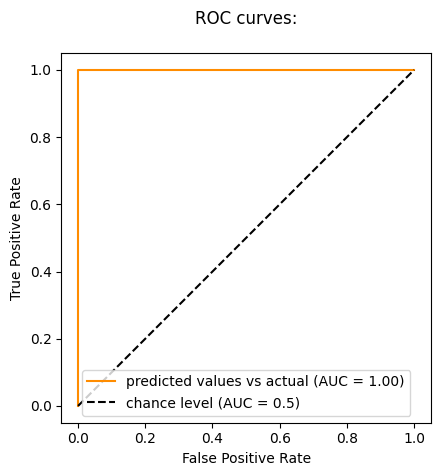

In [86]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_predictions(
    y_test,
    predictions,
    name=f"predicted values vs actual",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves:\n")
plt.legend(loc= 'lower center')
plt.show()

* ## **MODEL 2** 
# **Random Forest Classifier** 

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [88]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 1000,max_depth=5, min_samples_split= 10 )
X, y = make_classification(random_state=124)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=124)
pipe = make_pipeline(StandardScaler(), rf)
pipe.fit(X_train, y_train)
print("Training score : {}".format(pipe.score(X_train, y_train)))
print("Testing score : {}".format(pipe.score(X_test, y_test)))

Training score : 1.0
Testing score : 1.0


# **FEATURES IMPORTANCE**

In [89]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.01943273, 0.01500119, 0.01686142, 0.01325021, 0.04098664,
       0.02300003, 0.15680843, 0.02502378, 0.0146828 , 0.01129002,
       0.01353501, 0.01853351, 0.01671489, 0.01251315, 0.01362929,
       0.02104148, 0.40501179, 0.01577865, 0.13215658, 0.01474841])

# **MODEL PREDICTION**

In [90]:
# Predict the target variable on the testing set
y_pred = pipe.predict(X_test)

# Create a DataFrame with the actual values and the predicted values
results_df = pd.concat([ pd.Series(y_test), pd.Series(y_pred)], axis=1)
results_df.columns = ['Actual', 'Predicted']

# Print the first 10 rows of the DataFrame
print(results_df)

    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        0          0
4        0          0
5        1          1
6        1          1
7        0          0
8        1          1
9        1          1
10       1          1
11       0          0
12       1          1
13       0          0
14       0          0
15       0          0
16       1          1
17       1          1
18       0          0
19       0          0
20       0          0
21       0          0
22       1          1
23       1          1
24       1          1


In [91]:
result(y_pred,y_test).head(50)

,Prediction,Actual,predicted result,Actual result
0,1,1,fraudulent,fraudulent
1,1,1,fraudulent,fraudulent
2,1,1,fraudulent,fraudulent
3,0,0,not fraudulent,not fraudulent
4,0,0,not fraudulent,not fraudulent
5,1,1,fraudulent,fraudulent
6,1,1,fraudulent,fraudulent
7,0,0,not fraudulent,not fraudulent
8,1,1,fraudulent,fraudulent
9,1,1,fraudulent,fraudulent


# **ROC CURVE**

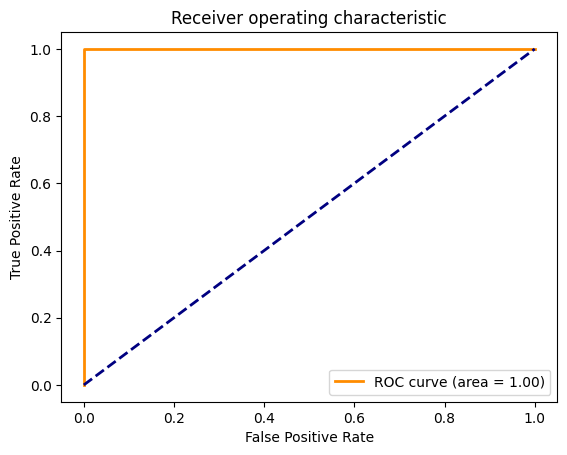

In [92]:
# Predict the probabilities of the positive class on the testing set
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for different probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()






